In [2]:
import pandas as pd

url_client_profiles = 'data/df_final_demo.txt'
url_digital_footprints1 = 'data/df_final_web_data_pt_1.txt'
url_digital_footprints2 = 'data/df_final_web_data_pt_2.txt'
url_experiment_roster = 'data/df_final_experiment_clients.txt'

df1 = pd.read_csv(url_digital_footprints1)
df2 = pd.read_csv(url_digital_footprints2)

# imported dataframes to work with
df_client_profiles = pd.read_csv(url_client_profiles)
df_exp_roster = pd.read_csv(url_experiment_roster)
# merged footprint files
df_footprints = pd.concat([df1, df2])

df_exp_roster - contains client id and variation. giving information, if the client was in the "Test" or in the "Control" group df_client_profiles - contains demographic clients information
df_footprints - contains information about the clients test process and the steps

In [4]:
df_client_profiles.rename(columns={'clnt_tenure_yr': 'client_tenure_years', 'clnt_tenure_mnth': 'client_tenure_months', 'clnt_age': 'client_age', 'gendr': 'gender', 'num_accts': 'num_accounts', 'bal': 'balance', 'calls_6_mnth': 'calls_6months', 'logons_6_mnth': 'logins_6months'}, inplace=True)
df_client_profiles_cleaned = df_client_profiles.dropna(subset=["client_tenure_years", "client_tenure_months", "client_age", "gender", "num_accounts", "balance", "calls_6months", "logins_6months"], how="all")
df_exp_roster_cleaned = df_exp_roster.dropna(subset=["Variation"], how="all")
df_footprints_cleaned = df_footprints.dropna(subset=["client_id", "visitor_id", "visit_id", "process_step", "date_time"], how="all")

df_client_profiles_cleaned[df_client_profiles_cleaned['gender']=='U']
df_client_profiles_cleaned['gender'] = df_client_profiles_cleaned['gender'].apply(lambda x: 'U' if x == 'X' else x)
df_client_profiles_cleaned['gender'].fillna('U')

C:\Users\merkm\AppData\Local\Temp\ipykernel_26244\191801006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_profiles_cleaned['gender'] = df_client_profiles_cleaned['gender'].apply(lambda x: 'U' if x == 'X' else x)


0        U
1        U
2        U
3        M
4        F
        ..
70604    U
70605    M
70606    F
70607    M
70608    F
Name: gender, Length: 70595, dtype: object

In [8]:
df_exp_roster_cleaned

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [10]:
df_footprints_cleaned

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [24]:
df_client_profiles_cleaned

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_6months,logins_6months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [18]:
# Preliminary client analysis:
# Who are the primary clients using this online process? "Durchschnitts"kunden 
# Are the primary clients younger or older, new or long-standing?

In [22]:
#gender frequency table 
frequency_table = df_client_profiles_cleaned['gender'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df_client_profiles_cleaned['gender'].value_counts(normalize=True)

frequency_table, proportion_table
# quite equally distributed between genders:  
# U    0.341738
# M    0.336058
# F    0.322204

(gender
 U    24125
 M    23724
 F    22746
 Name: count, dtype: int64,
 gender
 U    0.341738
 M    0.336058
 F    0.322204
 Name: proportion, dtype: float64)

In [32]:
# grouping by for different columns of the df
df_client_profiles_cleaned.groupby(['gender'])['client_age'].agg(['count', 'mean', 'std'])

,count,mean,std
gender,,,
F,22745,49.520950,14.705678
M,23724,48.582364,15.070928
U,24125,41.435088,15.670998


In [38]:
df_client_profiles_cleaned.groupby(['num_accounts'])['client_tenure_years'].agg(['count', 'mean', 'std'])

,count,mean,std
num_accounts,,,
1.0,2,7.500000,2.121320
2.0,55497,11.522515,6.454147
3.0,12529,13.746827,7.823152
4.0,2241,15.049531,8.346447
5.0,284,16.352113,7.786186
6.0,33,19.363636,8.532358
7.0,8,16.500000,8.864053
8.0,1,23.000000,NaN


In [36]:
df_client_profiles_cleaned.groupby(['gender', 'num_accounts'])['balance'].agg(['count', 'mean', 'std'])

count          mean           std
gender num_accounts                                   
F      1.0               1  1.378942e+04           NaN
       2.0           18379  1.076676e+05  1.752202e+05
       3.0            3633  2.283718e+05  3.745982e+05
       4.0             637  3.461817e+05  3.789694e+05
       5.0              83  5.664909e+05  8.002201e+05
       6.0               8  6.820600e+05  4.105220e+05
       7.0               4  4.210990e+05  3.149269e+05
       8.0               1  2.897512e+05           NaN
M      2.0           17373  1.459380e+05  2.868444e+05
       3.0            5126  3.415639e+05  5.931675e+05
       4.0            1051  5.731708e+05  7.177160e+05
       5.0             147  8.099532e+05  8.790588e+05
       6.0              23  1.068515e+06  1.560759e+06
       7.0               4  1.080893e+06  8.202890e+05
U      1.0               1  3.101234e+04           NaN
       2.0           19745  8.167564e+04  1.251126e+05
       3.0            3770  1.408021e+05  2.392321e+05
       4.0             553  2.239471e+05  3.289524e+05
       5.0              54  3.826598e+05  5.024491e+05
       6.0               2  3.848325e+05  4.211714e+05

In [40]:
# Summary statistics for the whole dataset
df_client_profiles_cleaned.describe()
# The average client has spent 12 years with the company, is around 46 years old, has 2 accounts, a balance of nearly 150.000, has had 3 calls and 6 logins in the last 6 months  

,client_id,client_tenure_years,client_tenure_months,client_age,num_accounts,balance,calls_6months,logins_6months
count,7.059500e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.005021e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877269e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016969e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483064e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


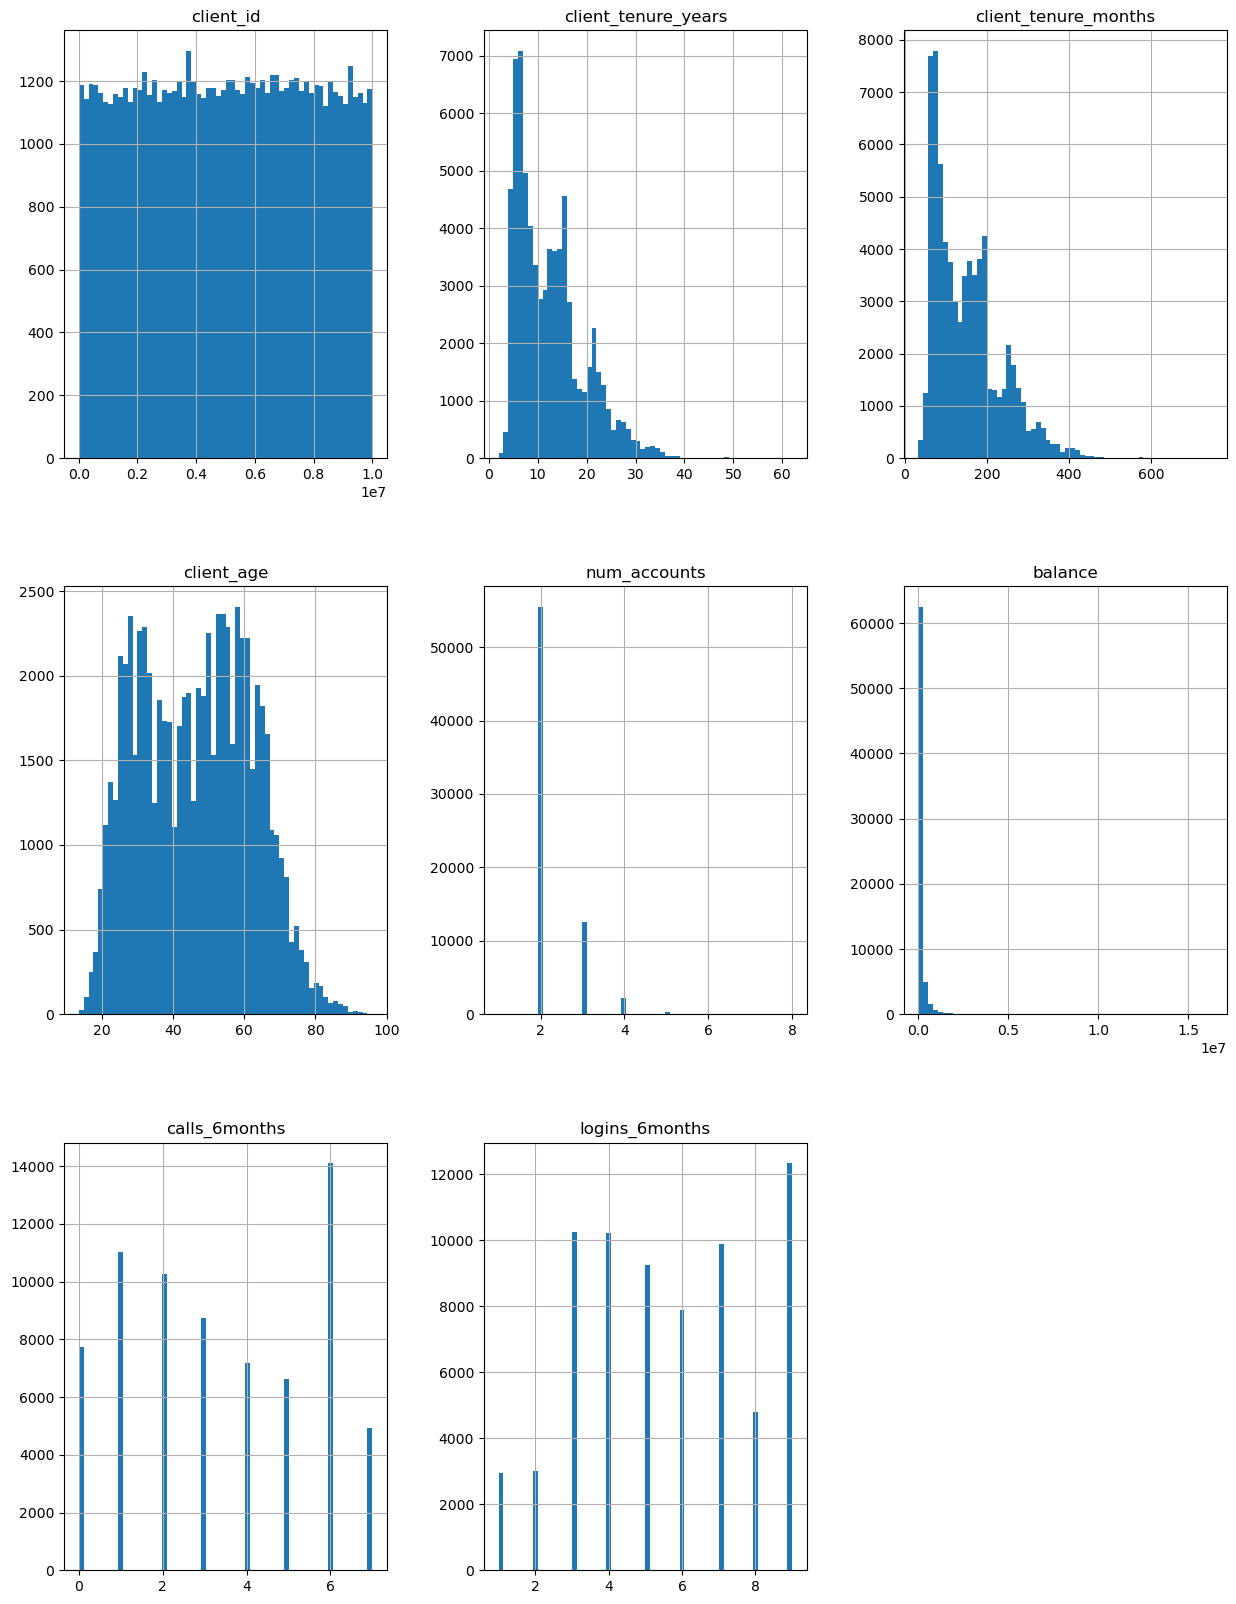

In [42]:
# Hist for each numerical column
df_client_profiles_cleaned.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);